In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
carros = pd.read_csv('C:/Users/User/Desktop/UNAD-SEM 6/Analisis de datos/tare 3/dataset/autos/CAR DETAILS FROM CAR DEKHO.csv')

In [7]:
carros.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [8]:
carros.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

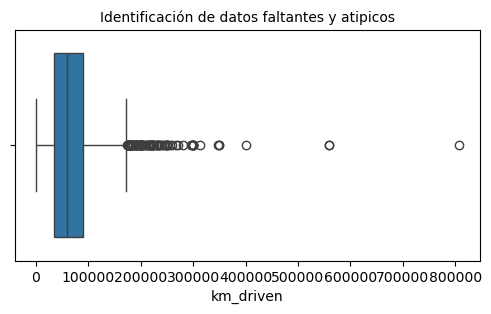

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['km_driven'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

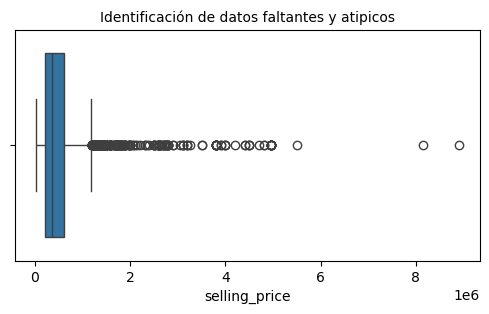

In [10]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['selling_price'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

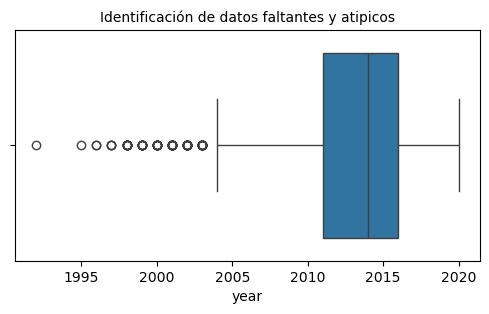

In [11]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['year'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

In [12]:
print("Cantidad de registros con cero en años: ",carros['year'].isin([0]).sum())
print("Cantidad de registros con cero en precio de venta: ",carros['selling_price'].isin([0]).sum())
print("Cantidad de registros con cero en km_driven: ",carros['km_driven'].isin([0]).sum())

Cantidad de registros con cero en años:  0
Cantidad de registros con cero en precio de venta:  0
Cantidad de registros con cero en km_driven:  0


In [21]:
nivel_min=20000
nivel_max=300000
total_atípicos=((carros['km_driven']<nivel_min)|(carros['km_driven']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atípicos))

El total de datos atípicos es 512


In [23]:
carros=carros[(carros['km_driven']<nivel_max)&(carros['km_driven']>nivel_min)]

In [25]:
total_atípicos=((carros['km_driven']<nivel_min)|(carros['km_driven']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atípicos))

El total de datos atípicos es 0


In [27]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3728 non-null   object
 1   year           3728 non-null   int64 
 2   selling_price  3728 non-null   int64 
 3   km_driven      3728 non-null   int64 
 4   fuel           3728 non-null   object
 5   seller_type    3728 non-null   object
 6   transmission   3728 non-null   object
 7   owner          3728 non-null   object
dtypes: int64(3), object(5)
memory usage: 262.1+ KB


In [98]:
import numpy as np

In [108]:
carros.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [110]:
carros_info = carros.select_dtypes(np.number)

In [114]:
carros_info.head(10)

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
5,2007,140000,125000
6,2016,550000,25000
7,2014,240000,60000
8,2015,850000,25000
9,2017,365000,78000


In [138]:
X = carros_info.drop('selling_price',axis=1) 
Y = carros_info['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [140]:
print (X_train)

      year  km_driven
3812  2015      60000
2479  2014      50000
686   2013      38000
3475  2016     175000
800   2013      41988
...    ...        ...
996   2012      70000
3824  2016      48980
1945  2019      40000
3067  2011      97000
3204  2011      97000

[2982 rows x 2 columns]


In [142]:
print (X_test)

      year  km_driven
788   2014      90000
1501  2007     100000
2102  2016      22000
1957  2008      54309
556   2016      52600
...    ...        ...
3659  2014     110000
4164  2018      50852
1265  2013      70000
3261  2017      40000
1935  2018      30000

[746 rows x 2 columns]


In [144]:
modelo_regresion = LinearRegression()
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)

In [146]:
X_test.head(10)

,year,km_driven
788,2014,90000
1501,2007,100000
2102,2016,22000
1957,2008,54309
556,2016,52600
853,2011,60000
1346,2010,100000
1289,2017,70000
2435,2014,130000
3371,1998,120000


In [148]:
print (Prediccion)

[ 545288.26179042  159136.24718593  675859.46166912  228054.62975463
  666351.02368617  390448.25327136  323298.25372751  715664.93368034
  532858.93109377 -339564.43778712  834428.2693972   554610.25981292
  552033.34882623  506725.72284889  159757.71372077  657836.93215896
  784368.59956126  362792.99247129  332620.25175001  596901.59796345
  669955.52958821  657836.93215896  328914.75753605  487460.26026908
  721879.59902866  221003.78118369  174983.64382416  660944.26483314
  665915.9971118   326405.58640167  502996.92363989  447654.78825787
  777035.29445024  114822.65693104  562720.93854766  670266.26285562
  610884.59499718  374911.58990054  873612.27487357  262362.91953197
  235865.22116442  451682.20213686  278900.76549041  720156.58306083
  332620.25175001  435846.92409605  284114.24825113  781261.2668871
  335727.58442417  445168.92211854  378018.9225747   504312.56829414
  639526.97437645  587579.59994096  716907.86675     385247.82130787
  414717.06191173  687698.93961287 

In [181]:
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Prediccion)

In [183]:
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE (Error Absoluto Medio): 230553.75
MSE (Error Cuadrático Medio): 154531370786.38
RMSE (Raíz del Error Cuadrático Medio): 393104.78
R² Score: 0.18
